# Solution 2.1 - Using OLS

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 

## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

***

# <span style='color:red'>Solution 1</span>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
INFILE = "../data/multi_asset_etf_data.xlsx"

In [3]:
info = pd.read_excel(INFILE,sheet_name='info').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,50026094,572926853120,The trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,7395415,60435103744,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,18043080,16526614528,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,21723,235239184,The fund generally will invest at least 90% of...
QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,49670,687488448,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,23767843,14188549120,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,465424,1206291584,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,3354686,3193291776,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7319141,34838351872,The underlying index measures the performance ...


In [4]:
rets = pd.read_excel(INFILE,sheet_name='total returns').set_index('Date')
rets

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2010-01-31,-0.036342,-0.050651,-0.077590,-0.003329,-0.015850,-0.018329,-0.078392,-0.054225,0.023702,-0.014605,0.015303,0.000272
2010-02-28,0.031194,0.002667,0.017764,0.021158,-0.000374,0.018734,0.041428,0.054571,0.003318,0.002418,-0.013031,0.000018
2010-03-31,0.060879,0.063854,0.081109,0.079607,0.019108,0.021335,-0.004655,0.097485,-0.010568,-0.000179,-0.000058,-0.000109
2010-04-30,0.015470,-0.028046,-0.001662,0.018182,-0.001838,0.019245,0.039116,0.063881,0.016527,-0.014474,0.025150,-0.000063
2010-05-31,-0.079455,-0.111928,-0.093936,-0.128968,-0.041621,-0.046756,-0.101473,-0.056835,0.029331,-0.036446,0.001917,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,-0.024060,-0.029502,-0.016967,-0.051399,-0.015700,-0.007803,0.017227,-0.082892,-0.022584,-0.033754,-0.017144,0.004031
2025-01-31,0.026856,0.048009,0.021521,0.067995,0.016237,0.013605,0.027596,0.018913,0.006166,0.000935,0.013702,0.003633
2025-02-28,-0.012695,0.029531,0.011470,-0.040107,-0.005952,0.009703,0.001366,0.037861,0.027997,0.013991,0.021572,0.003115


In [5]:
port =  pd.read_excel(INFILE,sheet_name='portfolio returns').set_index('Date')
port

,portfolio
Date,
2010-01-31,-0.012425
2010-02-28,0.019668
2010-03-31,0.046408
2010-04-30,0.024188
2010-05-31,-0.049523
...,...
2024-12-31,-0.043144
2025-01-31,0.027327
2025-02-28,0.004950


## <span style='color:red'>1.1</span>

In [6]:
X = sm.add_constant(rets['SPY'])
y = port
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     566.2
Date:                Sat, 31 May 2025   Prob (F-statistic):           9.12e-58
Time:                        14:57:58   Log-Likelihood:                 513.29
No. Observations:                 184   AIC:                            -1023.
Df Residuals:                     182   BIC:                            -1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.451      0.149      -0.004       0.001
SPY            0.6270      0.026     23.796      0.000       0.575       0.679
==============================================================================
Omnibus:                        2.378   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.152
Skew:                           0.110   Prob(JB):                        0.341
Kurtosis:                       3.482   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>1.2</span>

In [7]:
X = sm.add_constant(rets[['SPY', 'HYG']])
y = port
mod_multi = sm.OLS(y, X).fit()
mod_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     419.4
Date:                Sat, 31 May 2025   Prob (F-statistic):           1.13e-68
Time:                        14:57:58   Log-Likelihood:                 542.28
No. Observations:                 184   AIC:                            -1079.
Df Residuals:                     181   BIC:                            -1069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -1.526      0.129      -0.003       0.000
SPY            0.3826      0.037     10.221      0.000       0.309       0.456
HYG            0.5766      0.070      8.187      0.000       0.438       0.716
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.519
Skew:                           0.128   Prob(JB):                        0.772
Kurtosis:                       2.954   Cond. No.                         81.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include CL1. Also note that the R-squared is much higher.

## <span style='color:red'>1.3</span>

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

In [8]:
corr_port = port.corrwith(mod.fittedvalues).values[0]
corr_port_multi = port.corrwith(mod_multi.fittedvalues).values[0]
print(f'Correlation between portfolio and replication: {corr_port_multi:.2%}.')
print(f'Square of this correlation is {corr_port_multi**2:.2%}\nwhich equals the R-squared.')

Correlation between portfolio and replication: 90.69%.
Square of this correlation is 82.25%
which equals the R-squared.


## <span style='color:red'>1.4</span>

In [9]:
TICKreg1 = 'SPY'
TICKreg2 = 'HYG'
corrREGS = rets[TICKreg2].corr(rets[TICKreg1])
print(f'Correlation between {TICKreg1} and {TICKreg2} is {corrREGS:.1%}')

Correlation between SPY and HYG is 79.8%


The beta for SPY in (2) is much smaller than in (1). This is because HYG and SPY are significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by HYG. Thus, in eq (2) this gets attributed more directly to HYG, and less is attributed to SPY.

## <span style='color:red'>1.5</span>

Without doing calculation, the intuition is that the second regression includes HYG as a regressor. Sample residuals are always uncorrelated (in-sample) to the regressors. Thus, in this regression we know the sample residual will have zero correlation to HYG. In the first regression, HYG was not a regressor, so it may have substantial correlation to the sample residual.

For population residuals, $\epsilon$, we still expect much smaller correlation to HYG in the second regression, though this population residual may still have some correlation to HYG.

In [10]:
print(f'Correlation between {TICKreg2} and the sample residual:\nUnivariate = {TICKreg1}: {rets[TICKreg2].corr(mod.resid):.2%}')
print(f'Multivariate = {TICKreg1} and {TICKreg2}: {rets[TICKreg2].corr(mod_multi.resid):.2%}')

Correlation between HYG and the sample residual:
Univariate = SPY: 31.35%
Multivariate = SPY and HYG: -0.00%


***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*


## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2022.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2022**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2023-2024** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***

# <span style='color:red'>Solution 2</span>

## <span style='color:red'>2.1</span>

In [11]:
X = sm.add_constant(rets)
y = port
mod_exact = sm.OLS(y, X).fit()
display(mod_exact.params.to_frame().rename(columns={0:'weights'}).sort_values('weights',ascending=False).T.style.format('{:.2f}'))
mod_exact.summary()

,IEF,QAI,IYR,PSP,SHV,const,HYG,BWX,TIP,SPY,DBC,EFA,EEM
weights,0.25,0.25,0.25,0.25,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.830e+29
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        14:57:59   Log-Likelihood:                 6337.7
No. Observations:                 184   AIC:                        -1.265e+04
Df Residuals:                     171   BIC:                        -1.261e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.008e-16   2.64e-17      7.596      0.000    1.49e-16    2.53e-16
SPY        -3.886e-16   1.38e-15     -0.282      0.778   -3.11e-15    2.33e-15
EFA        -7.494e-16   1.32e-15     -0.566      0.572   -3.36e-15    1.86e-15
EEM        -8.743e-16   7.96e-16     -1.098      0.274   -2.45e-15    6.98e-16
PSP            0.2500   9.83e-16   2.54e+14      0.000       0.250       0.250
QAI            0.2500   3.65e-15   6.85e+13      0.000       0.250       0.250
HYG        -7.633e-17   1.93e-15     -0.039      0.969   -3.89e-15    3.74e-15
DBC        -6.592e-16   6.03e-16     -1.093      0.276   -1.85e-15    5.31e-16
IYR            0.2500   7.82e-16    3.2e+14      0.000       0.250       0.250
IEF            0.2500   2.52e-15   9.93e+13      0.000       0.250       0.250
BWX        -2.314e-16   1.63e-15     -0.142      0.887   -3.45e-15    2.98e-15
TIP        -3.608e-16   2.79e-15     -0.129      0.897   -5.88e-15    5.16e-15
SHV         4.441e-16   1.39e-14      0.032      0.975   -2.71e-14    2.79e-14
==============================================================================
Omnibus:                       22.658   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.597
Skew:                          -0.580   Prob(JB):                     1.26e-10
Kurtosis:                       5.145   Cond. No.                         686.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>2.2</span>

In [12]:
T1 = '2022'
T2 = '2023'
TICKrep = 'EEM'

rets_IS = rets.loc[:T1,:]

X = sm.add_constant(rets_IS.drop(columns=TICKrep))
y = rets_IS[[TICKrep]]
mod_replicate = sm.OLS(y, X).fit()
mod_replicate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     43.24
Date:                Sat, 31 May 2025   Prob (F-statistic):           3.73e-40
Time:                        14:57:59   Log-Likelihood:                 348.19
No. Observations:                 156   AIC:                            -672.4
Df Residuals:                     144   BIC:                            -635.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.521      0.603      -0.004       0.007
SPY           -0.2393      0.154     -1.555      0.122      -0.543       0.065
EFA            0.5338      0.145      3.672      0.000       0.246       0.821
PSP            0.0037      0.119      0.031      0.975      -0.232       0.240
QAI            1.1292      0.375      3.015      0.003       0.389       1.870
HYG           -0.0069      0.194     -0.036      0.972      -0.391       0.377
DBC            0.0212      0.062      0.340      0.734      -0.102       0.145
IYR            0.0785      0.082      0.953      0.342      -0.084       0.241
IEF           -0.8116      0.272     -2.988      0.003      -1.349      -0.275
BWX            0.5937      0.169      3.504      0.001       0.259       0.929
TIP            0.2940      0.295      0.997      0.321      -0.289       0.877
SHV            0.6187      2.745      0.225      0.822      -4.807       6.044
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.209
Skew:                           0.005   Prob(JB):                        0.901
Kurtosis:                       2.821   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is reported in the table above.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. 
- It does not need to be between 0 and 1.

The stats-models Python package puts a "Note" at the bottom of the table above reminding users of that fact.

### See the t-stats below, in descending order:

In [13]:
mod_replicate.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,EFA,BWX,QAI,TIP,IYR,const,DBC,SHV,PSP,HYG,SPY,IEF
t-stats,3.7,3.5,3.0,1.0,1.0,0.5,0.3,0.2,0.0,-0.0,-1.6,-3.0


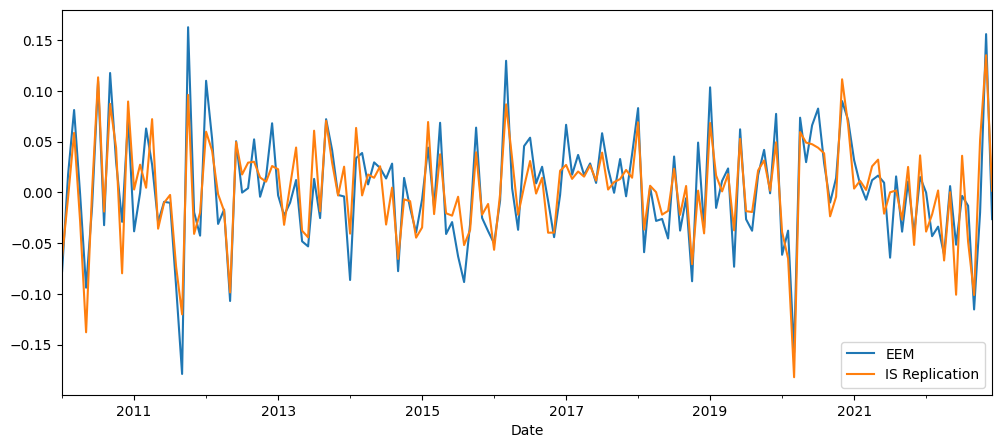

In [14]:
pd.concat([y, mod_replicate.fittedvalues.rename('IS Replication')], axis=1).plot(figsize=(12, 5))
plt.show()

## 2.3

In [15]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [16]:
rets_OOS = rets.loc[T2:,:]
X = sm.add_constant(rets_OOS.drop(columns=TICKrep))
y = rets_OOS[[TICKrep]]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [17]:
print(f'Correlation between {TICKrep} and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between EEM and Replicating Portfolio
In-Sample: 87.6%
Out-of-Sample: 81.9%


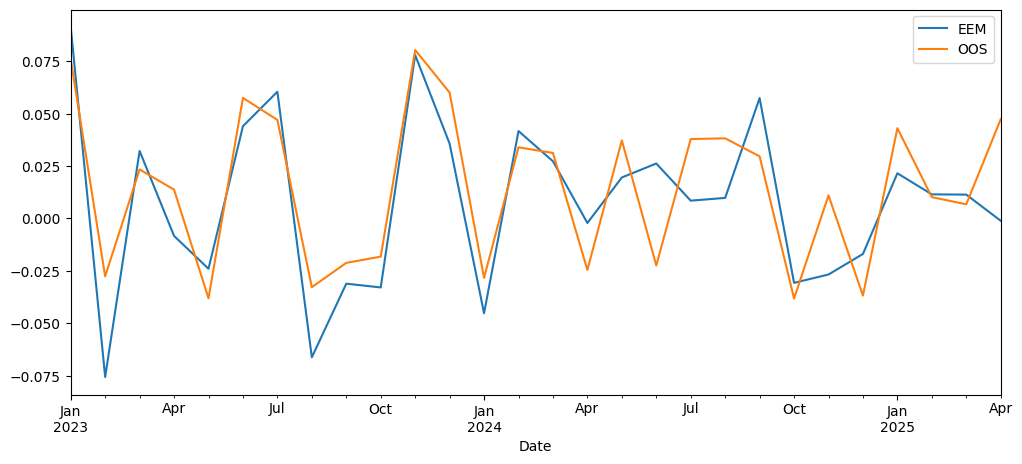

In [18]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()